<a href="https://colab.research.google.com/github/TheKoray18/LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kütüphanelerimizi çağırıyoruz


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def Sigmoid(x):
  z=1/(1+np.exp(-x))   
  return z

- Sigmoid Fonksiyonunu oluşturduk.
- Sigmoid fonkiyonunu bize 0-1 arasında değerler döndürür.Bunu da x'e değer vererek görebiliriz. 

In [13]:
x=5

Sigmoid(x)

0.9933071490757153

0 - 10 a kadar olan değerlerin sigmoid function degerleri

In [22]:
values=[]
for i in range(11):
  values.append(Sigmoid(i))
  print("{} = {}".format(i,values[i]))

0 = 0.5
1 = 0.7310585786300049
2 = 0.8807970779778823
3 = 0.9525741268224334
4 = 0.9820137900379085
5 = 0.9933071490757153
6 = 0.9975273768433653
7 = 0.9990889488055994
8 = 0.9996646498695336
9 = 0.9998766054240137
10 = 0.9999546021312976


Weight ve Bias Değerlerimizi oluşturuyoruz


In [ ]:
def weight_bias(dim):
  w=np.full((dim,1),0.01)
  b=0.0
  return w,b

In [ ]:
dim=2

weight_bias(dim)

(array([[0.01],
        [0.01]]), 0.0)

- Dim=Dimension.O parametre bizim resimlerimizin boyutu.Inputumuzda kaç adet resim var ise onun sayısıdır.Burada random bir değer verip test edebiliyoruz weight ve bias değerlerimizi

Şimdi Forward Propagation'a başlayacağız.Forward Propagation ve Backward Propagation beraber tanımlayacağız.

In [ ]:
def Propagation(w,b,x,y):
  z=np.dot(w.T,x)+b
  
  y_head=Sigmoid(z)

  loss=-(y*np.log(y_head))-(1+y)*np.log(1-y_head)

  cost=(np.sum(loss)) / x.shape[1]

  #Backward Propagation

  derivative_weight=(np.dot(x,((y_head-y).T))) / x.shape[1]

  derivative_bias=np.sum(y_head-y) / x.shape[1]

  gradients={"dw":derivative_weight,"db":derivative_bias}

  return cost,gradients

In [ ]:
w, b, x, y = np.array([[1.],[2.]]), 2., np.array([[1.,3.,-1.],[2.,5.,-1.2]]), np.array([[1,0,1]])

cost,gradients=Propagation(w,b,x,y)

print("Cost="+str(cost))
print("derivative_weight="+str(gradients["dw"]))
print("derivative_bias="+str(gradients["db"]))

Cost=10.354662311598988
derivative_weight=[[1.26709064]
 [1.98693234]]
derivative_bias=0.06563491811493023


- y parametremiz bizim Tahmin(predict) değerlerimiz olduğundan O ile 1'lerden oluşan bir veri kümesi olmak zorunda.
- Diğer parametrelerimizin değerlerini değiştirip weight ve bias parametrelerinin türev sonuçlarına ve cost fonksiyonu değerlerimizin sonuçlarına bakabiliriz

In [ ]:
def Optimize(w,b,x,y,num_iteration,learning_rate):
  costs=[]
  costs2=[]
  index=[]

  for i in range(num_iteration):
    cost,gradients=Propagation(w,b,x,y)
    costs.append(cost)
    
    dw=gradients["dw"]
    db=gradients["db"]

    w= w - learning_rate * dw

    b= b - learning_rate * db

    if i % 10 == 0:
      costs2.append(cost)
      index.append(i)

      print("Cost after iteration %i:%f" %(i, cost))

  params={"w":w,"b":b}

  gradients={"dw":dw,"db":db}

  plt.plot(index,costs2)
  plt.xticks(index,rotation='vertical')
  plt.xlabel("Number of Iterarion")
  plt.ylabel("Cost")
  plt.show()

  return params,gradients,costs


Cost after iteration 0:10.354662
Cost after iteration 10:9.591220
Cost after iteration 20:8.855377
Cost after iteration 30:8.149807
Cost after iteration 40:7.475983
Cost after iteration 50:6.834134
Cost after iteration 60:6.223557
Cost after iteration 70:5.643249
Cost after iteration 80:5.092890
Cost after iteration 90:4.574401
Cost after iteration 100:4.094711
Cost after iteration 110:3.670000
Cost after iteration 120:3.326767
Cost after iteration 130:3.086321
Cost after iteration 140:2.940752
Cost after iteration 150:2.860147
Cost after iteration 160:2.817111
Cost after iteration 170:2.794822
Cost after iteration 180:2.784188
Cost after iteration 190:2.780354


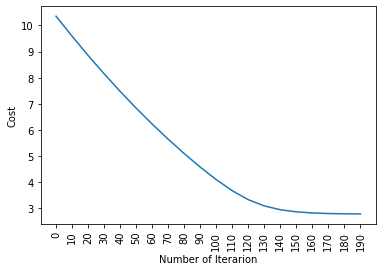

w=[[-0.46460713]
 [-0.33438141]]
b=1.7945735771248694
dw=[[0.1294979 ]
 [0.16789161]]
db=-0.061452440215221414


In [ ]:
params, gradients, costs = Optimize(w, b, x, y, num_iteration= 200, learning_rate = 0.009)

print("w="+str(params["w"]))
print("b="+str(params["b"]))
print("dw="+str(gradients["dw"]))
print("db="+str(gradients["db"]))

- Oluşturduğumuz listeleri (costs,costs2,index) depolayıp görselleştrimek için kullandık.

- Number of Iteration= Bizim forward ve Backward Propagation kaç kez yaptığımızın sayısıdır.Bu şu demek;

Bir kez forward yapıyorum ardından geriye dönüp backward yapıyorum ve daha sonra Gradient Descent metodu ile weight ve bias parametrelerini güncelliyorum.Bu yaptığımız işlem de number of iterations=1 oluyor.Biz num_iteration parametresine 200 dedik.Yani weight ve bias parametrelerini 200 kez güncellemiş olduk.

- Weight ve Bias parametrelerini güncellerken yaptığımız işlem;

   w= w - learning rate * weight Türevi

   b= b - learning rate * bias Türevi

- Learning rate= Öğrenme oranımızdır.

In [ ]:
def Predict(w,b,x):

  m=x.shape[1]

  y_prediction=np.zeros((1,m))

  y_head=Sigmoid((np.dot(w.T,x)+b))

  for i in range(y_head.shape[1]):

    if y_head[0,i] <= 0.5:

      y_prediction[0,i] == 0

    else:

      y_prediction[0,i] == 1

  return y_prediction      


In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
x = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(Predict(w, b, x)))

predictions = [[0. 0. 0.]]


Prediction için Predict fonksiyonu oluşturduk

- y_prediction=np.zeros ile 0'lardan oluşan bir array oluşturduk.

- Sigmoid fonksiyonunu kullanarak sigmoid(z=(w.T*x)+b) ile y_head'ı olusturduk.

- y_head 0.5'ten küçük olduğu değerlerde y_prediction=0 olacak 

- y_head 0.5'ten büyük olduğu değerlerde y_prediction=1 olacak

- Çünkü Sigmoid fonksionu probabilistik(probability) değer döndürür